- Import data
- Plot data
- Cluster
- Plot clusters

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt

# Importing and plotting


In [2]:
# Georrferenced dataset
df = pd.read_csv("../dataset_pisa.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat), crs="EPSG:4326")
start_x, start_y, end_x, end_y = gdf.total_bounds

/tmp/ipykernel_30429/454111029.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


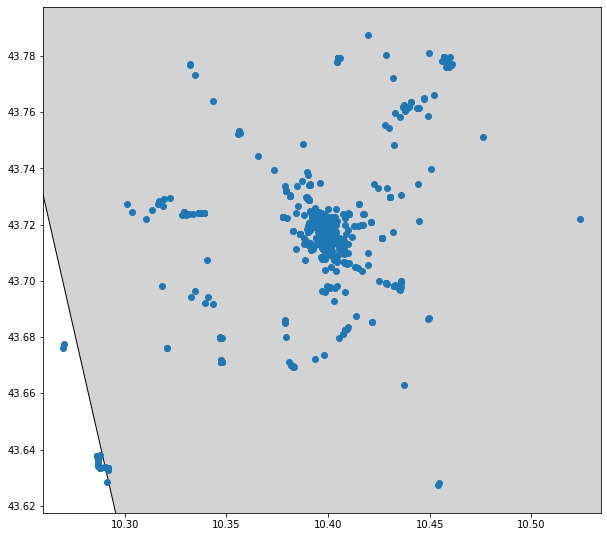

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(start_x-0.01, end_x+0.01)
ax.set_ylim(start_y-0.01, end_y+0.01)
# Background map of italy
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
italy = countries[countries["name"] == "Italy"]
italy.plot(ax=ax, color="lightgrey", edgecolor="black")

# Data points
gdf.plot(ax=ax)
plt.show()


# Clustering

In [4]:
hdb = HDBSCAN(min_cluster_size=5)
cluster = hdb.fit(gdf[["lat", "lon"]])
gdf["cluster"] = cluster.labels_
total_clusters = len(set(gdf["cluster"]))

# Plotting clusters

/tmp/ipykernel_30429/1281084319.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


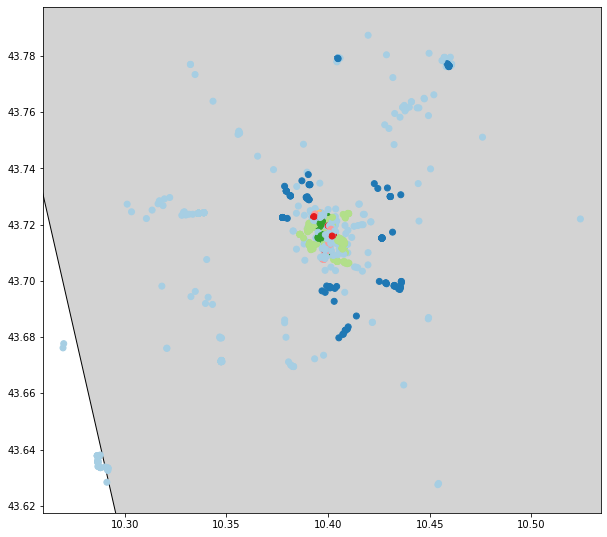

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(start_x-0.01, end_x+0.01)
ax.set_ylim(start_y-0.01, end_y+0.01)
# Background map of italy
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
italy = countries[countries["name"] == "Italy"]
italy.plot(ax=ax, color="lightgrey", edgecolor="black")

# Data points
gdf.plot(ax=ax, column="cluster", cmap="Paired")
plt.show()

## Plot ignoring outliers

/tmp/ipykernel_30429/1723093764.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


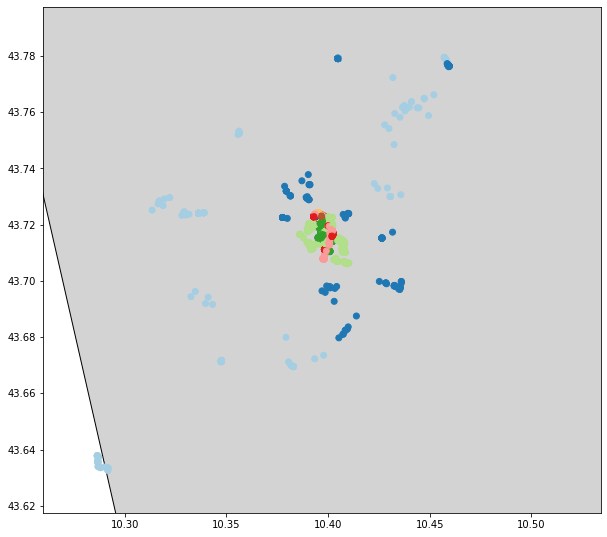

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(start_x-0.01, end_x+0.01)
ax.set_ylim(start_y-0.01, end_y+0.01)
# Background map of italy
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
italy = countries[countries["name"] == "Italy"]
italy.plot(ax=ax, color="lightgrey", edgecolor="black")

# Data points

gdf[gdf["cluster"] != -1].plot(ax=ax, column="cluster", cmap="Paired")
plt.show()